**Lasso regression** technique has been used to identify the coefficient of Maxwell series that represent the properties of viscoelastic material. Maxwell series effectively models the storage modulus, loss modulus, and shear modulus, which are key parameters in understanding how these materials respond to stress and strain over time.

The storage modulus ($G^{\prime}$) represents the elastic portion of the material's response to deformation.

$
G^{\prime}(\omega) = \sum_{i=1}^{n} g_i \frac{(\omega τ_i)^2}{1+(\omega τ_i)^2}
$

The loss modulus indicates how much energy is dissipated as heat during each cycle of deformation.

$
G^{\prime\prime}(\omega) = \sum_{i=1}^{n} g_i \frac{(\omega τ_i)}{1+(\omega τ_i)^2}
$

The shear modulus of a viscoelastic material is a complex quantity that combines both the storage and loss moduli. It describes the overall response of the material to shear deformation and is represented as:
$  
G(\omega) = G^{\prime}(\omega) + i G^{\prime\prime}(\omega)
$

The real part ($G^{\prime}$) represents the elastic response, and the imaginary part ($G^{\prime\prime}$) represents the viscous response. Shear modulus can be expressed as a Maxwell series as:
$
G(t)=\sum_{i=1}^{n} g_i  exp(\frac{-t}{τ_i})
$

By measuring ($G^{\prime}$) and ($G^{\prime\prime}$) across a range of frequencies, researchers can gain insights into the material's elastic and viscous properties. The generalized Maxwell model allows engineers to predict how viscoelastic materials will behave under different loading conditions.

In conventional techniques, it is difficult and complex to find the shear modulus from storage and loss modulus data. On the other hand, the Lasso regression-based machine learning technique can find shear modulus from storage and loss modulus effectively which is more precise than conventional technique.

#####Load necessary library

In [ ]:
from sklearn.linear_model import Lasso
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

##### Load experimental data

In [ ]:
## Experimental data has been collected from the reference paper([L. Andreozzi et al. / Construction and Building Materials 65 (2014) 1–13]).

o_data = pd.read_csv('./sample_data/Data_076.csv')
o_data.head()

,omega,Gp,Gdp
0,2.003440e-08,0.07210,0.00603
1,3.566130e-08,0.06703,0.01921
2,6.330880e-08,0.07548,0.02940
3,1.125930e-07,0.08393,0.02597
4,2.003440e-07,0.09181,0.03030


##### Convert experimental data into necessary format or unit.

In [ ]:
O_Omega=(o_data['omega'].to_numpy()*0.1591549)
O_Gp=(o_data['Gp'].to_numpy()*10**6)
O_Gdp=(o_data['Gdp'].to_numpy()*10**6)

##### Plot Storage molulus versus frequency to see the nature of experimental data.

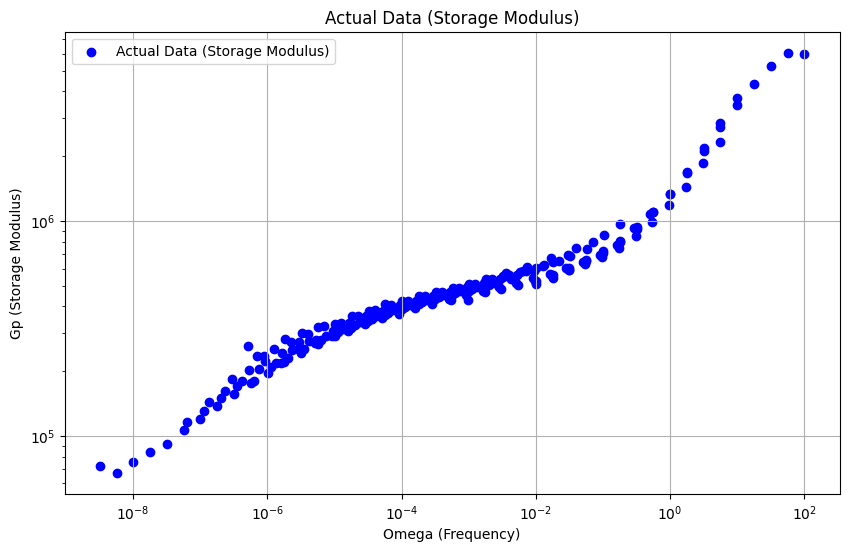

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(O_Omega, O_Gp, label="Actual Data (Storage Modulus)", color="blue")
plt.xlabel("Omega (Frequency)")
plt.ylabel("Gp (Storage Modulus)")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title("Actual Data (Storage Modulus)")
plt.grid(True)
plt.savefig('./sample_data/Gp_076_Raw.png')
plt.show()

##### Plot Loss molulus versus frequency to see the nature of experimental data.

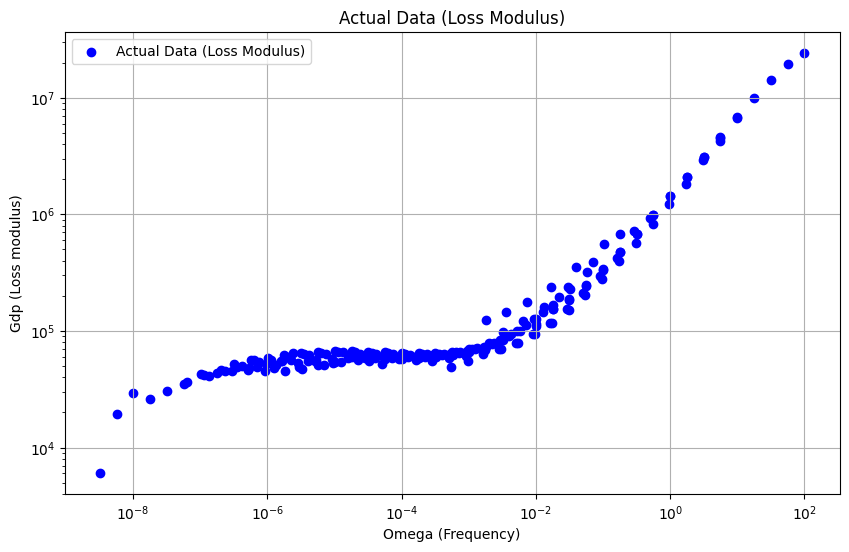

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(O_Omega, O_Gdp, label="Actual Data (Loss Modulus)", color="blue")
plt.xlabel("Omega (Frequency)")
plt.ylabel("Gdp (Loss modulus)")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title("Actual Data (Loss Modulus)")
plt.grid(True)
plt.savefig('./sample_data/Gdp_076_Raw.png')
plt.show()

In [ ]:
f_Gp=O_Gp
f_Gdp=O_Gdp
f_Omega=O_Omega

##### Assign some necessary variable for Lasso regression

In [ ]:
##### Number of Relaxation Time
##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### #####
##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### #####

number_coefficients=44    ##### Number of Relaxation Time

np.random.seed(42)
A=np.random.rand(404,number_coefficients)
G=np.random.rand(404)
t=np.random.rand(number_coefficients)
coefficients=np.random.rand(number_coefficients)

##### Select appropriate relaxation time

In [ ]:
t=np.logspace(-4,8,number_coefficients)

##### Arrange experimental data into matrix form (G=A b) that Lasso can be applied. A matrix as below:

In [ ]:
for i in range(0,number_coefficients):
  A[0:202,i]=((f_Omega**2)*(t[i]**2))/(1+(f_Omega**2)*(t[i]**2))
  A[202:404,i]=((f_Omega)*(t[i]))/(1+(f_Omega**2)*(t[i]**2))

##### Arrange G matrix

In [ ]:
G[0:202]=f_Gp
G[202:404]=f_Gdp

##### Lasso penelty terms

In [ ]:
alphas_number=800
alphas = np.logspace(-3, 5, alphas_number)

##### Initialize some variables

In [ ]:

train_errors = np.random.rand(alphas_number+1)
t_error = 1e200
coefficients = np.random.rand(number_coefficients)
temp_coeff = np.random.rand(number_coefficients)
All_coefficients=np.random.rand(alphas_number+1,number_coefficients)
nonzero_coefficients = np.random.rand(alphas_number+1)
All_alphas=np.random.rand(alphas_number+1)

##### Apply Lasso regression method

In [ ]:
# Train Lasso regression model for each alpha
counter=0
index=0
non_zero_co=0
All_coefficients[0,:]=t
train_errors[0] = 0
nonzero_coefficients[0] =0
All_alphas[0]=0
for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(A, G)

    # Compute training error
    train_pred = lasso_reg.predict(A)
    train_error = np.sqrt(mean_squared_error(G, train_pred))
    train_errors[counter+1] = train_error
    temp_coeff=lasso_reg.coef_
    for i in range(0,number_coefficients):
      if temp_coeff[i]<0:
        temp_coeff[i]=0
    All_coefficients[counter+1,:] = temp_coeff
    nonzero_coefficients[counter+1] = (np.count_nonzero(temp_coeff))
    All_alphas[counter+1]=alpha
    counter=counter+1
    if t_error> train_error:
      t_error = train_error
      index=counter
      coefficients = temp_coeff
      non_zero_co=(np.count_nonzero(temp_coeff))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.981e+12, tolerance: 1.531e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.981e+12, tolerance: 1.531e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.981e+12, tolerance: 1.531e

##### Plot the results of Lasso regression method. Error versus penelty term and non-zero coefficients versus penelty term are ploted below:

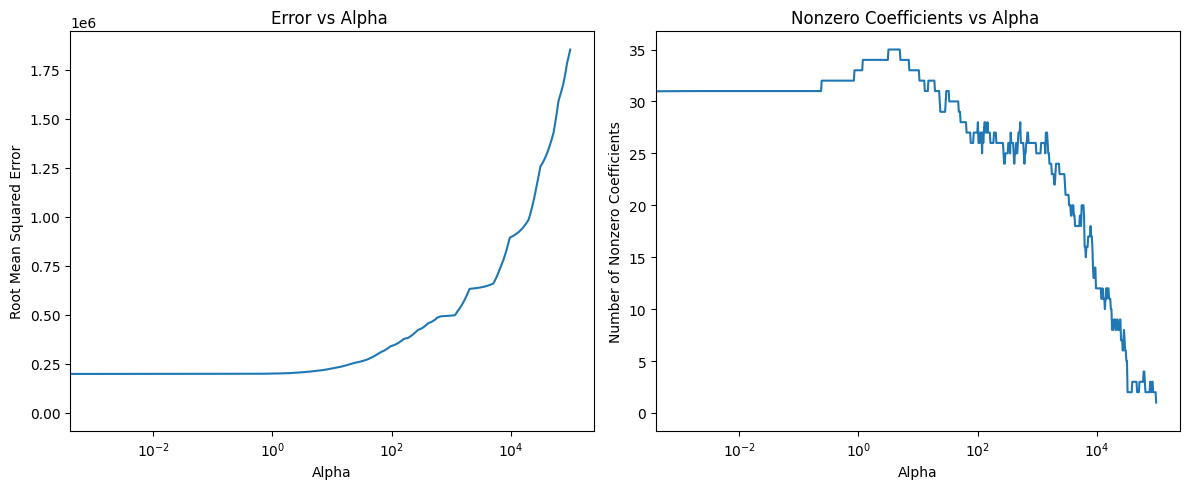

In [ ]:
# Plot both error vs alpha and number of nonzero coefficients vs alpha together
plt.figure(figsize=(12, 5))

# Plot error vs alpha
plt.subplot(1, 2, 1)
plt.plot(All_alphas, train_errors)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Root Mean Squared Error')
plt.title('Error vs Alpha ')                   ####### Change Relaxation Time

# Plot number of nonzero coefficients vs alpha
plt.subplot(1, 2, 2)
plt.plot(All_alphas, nonzero_coefficients)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Number of Nonzero Coefficients')
plt.title('Nonzero Coefficients vs Alpha ')     ####### Change Relaxation Time

plt.tight_layout()
plt.savefig('./sample_data/error01_for_'+str(number_coefficients)+'.png')                      ####### Change Relaxation Time
plt.show()

##### Print some results related to regression method

In [ ]:
print("Errors:",t_error)                            ############### Copy the error values
print("Coefficients:",coefficients)
print("index:",index)
print("Non_Zero:",non_zero_co)

Errors: 198663.41061430954
Coefficients: [1.19263783e+10 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.40559976e+07
 2.36539886e+07 0.00000000e+00 2.22510776e+06 4.39813304e+06
 0.00000000e+00 3.35335435e+05 5.15835246e+05 0.00000000e+00
 9.33283178e+04 1.46609008e+05 3.97453739e+04 2.06701753e+04
 6.50754048e+04 1.68208050e+04 0.00000000e+00 2.93150271e+04
 4.68038844e+04 6.30811749e+03 0.00000000e+00 4.03716386e+04
 2.82567976e+04 8.92647323e+03 2.71328654e+04 3.86553528e+04
 1.46848003e+04 1.06239309e+04 4.09570314e+04 2.41285702e+04
 0.00000000e+00 2.41930504e+04 5.26120020e+04 2.92943560e+03
 0.00000000e+00 1.83769052e+04 2.67280456e+04 5.90798419e+04]
index: 214
Non_Zero: 31


##### Plot the values of the Maxwell series coefficients

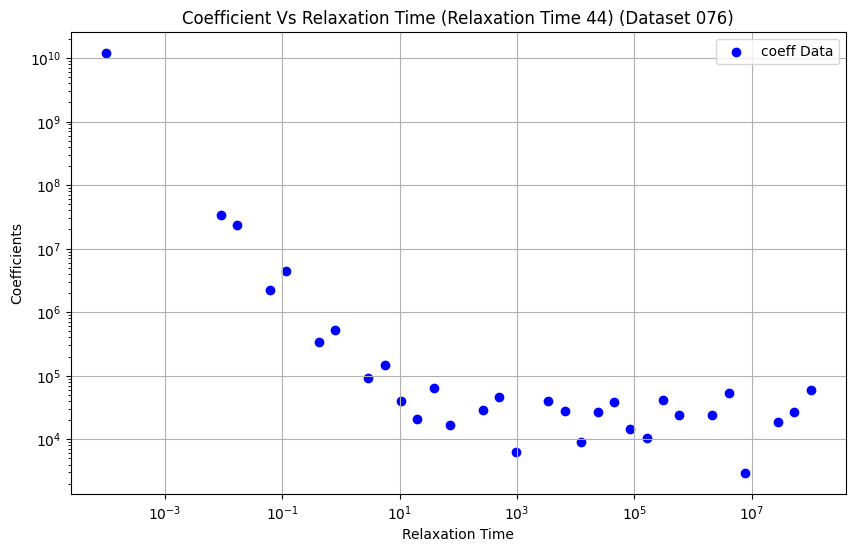

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(t, coefficients, label='coeff Data', color='blue')
#plt.plot(omega_fit, Gdp_fit, label='Fitted Data', color='red')
#plt.scatter(X_equally_spaced, Y_equally_spaced, label='Selected Data', color='orange')
plt.xlabel('Relaxation Time')
plt.ylabel('Coefficients')
plt.xscale('log')
plt.yscale('log')
plt.title('Coefficient Vs Relaxation Time (Relaxation Time '+str(number_coefficients)+') (Dataset 076)')    ######### Change Relaxation Time
plt.legend()
plt.grid(True)
plt.savefig('./sample_data/Cof_V_Re_076_for_'+str(number_coefficients)+'.png')            ######### Change Relaxation Time
plt.show()

##### Prepare the data file for next evaluation  

In [ ]:
df1=pd.DataFrame(train_errors)
df2=pd.DataFrame(All_coefficients)
df3=pd.DataFrame(nonzero_coefficients)
df4=pd.DataFrame(All_alphas)
#result_df = pd.concat([original_df, new_df], axis=1)
df_t = pd.concat([df1,df3,df4,df2], axis=1)

In [ ]:
df1.to_csv('./sample_data/errors01_for_'+str(number_coefficients)+'.csv',index=False)         ### change relaxation time
df2.to_csv('./sample_data/coeff01_for_'+str(number_coefficients)+'.csv',index=False)          ### change relaxation time
df3.to_csv('./sample_data/non_zeros01_for_'+str(number_coefficients)+'.csv',index=False)      ### change relaxation time
df_t.to_csv('./sample_data/results01_for_'+str(number_coefficients)+'.csv')                   ### change relaxation time

In [ ]:
print("File Created ............")
Scientific_format="{:e}".format(t_error)
print("Minimum:",Scientific_format)

File Created ............
Minimum: 1.986634e+05


##### Calculate the Storage and Loss modulus from the coefficients of Maxwell series that are determined by the above analysis.

In [ ]:
Gp_C=0
Gdp_C=0

for i in range(0,number_coefficients):
  Gp_C=Gp_C+((O_Omega**2)*(t[i]**2))/(1+(O_Omega**2)*(t[i]**2))*coefficients[i]
  Gdp_C=Gdp_C+((O_Omega)*(t[i]))/(1+(O_Omega**2)*(t[i]**2))*coefficients[i]


loss1=np.sqrt((1/200)*(np.sum((O_Gp-Gp_C)**2)))
loss2=np.sqrt((1/200)*(np.sum((O_Gdp-Gdp_C)**2)))
Total_loss=loss1+loss2
print(Total_loss)

14057090.174631687


In [ ]:
df1=pd.DataFrame(t)
df2=pd.DataFrame(coefficients)

In [ ]:
df1.to_csv('./sample_data/relax01_for_'+str(number_coefficients)+'.csv',index=False)   ##### Chnage Relaxation Time
df2.to_csv('./sample_data/coeff01_for_'+str(number_coefficients)+'.csv',index=False)   ##### Chnage Relaxation Time
#df3.to_csv('./sample_data/loss01.csv',index=False)

##### Plot the actual and data driven storage modulus to see the accuracy.

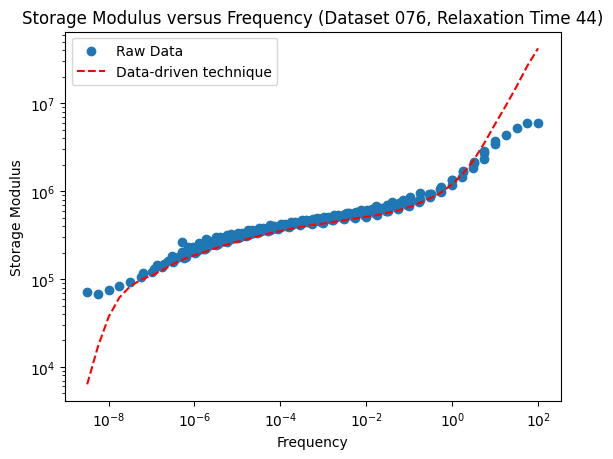

In [ ]:

plt.scatter(O_Omega, O_Gp, label='Raw Data')
plt.plot(O_Omega, Gp_C, linestyle='--',label='Data-driven technique', color='red')
plt.title('Storage Modulus versus Frequency (Dataset 076, Relaxation Time '+str(number_coefficients)+')')   #### Chnage relaxation Time
plt.xlabel('Frequency')
plt.ylabel('Storage Modulus')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig('./sample_data/Lasso_Gp_log02_for_'+str(number_coefficients)+'.png')       #### Chnage Relaxation Time
plt.show()

#####Plot the actual and data driven Loss modulus to see the accuracy.

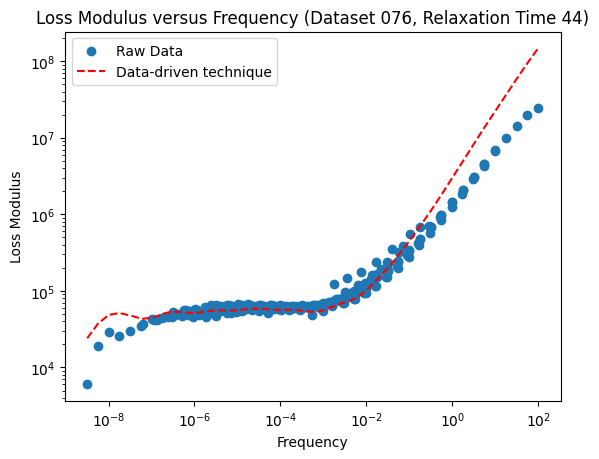

In [ ]:

plt.scatter(O_Omega, O_Gdp, label='Raw Data')
plt.plot(O_Omega, Gdp_C, linestyle='--',label='Data-driven technique', color='red')
plt.title('Loss Modulus versus Frequency (Dataset 076, Relaxation Time '+str(number_coefficients)+')') #### Chnage Relaxation Time
plt.xlabel('Frequency')
plt.ylabel('Loss Modulus')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig('./sample_data/Lasso_Gdp_log02_for_'+str(number_coefficients)+'.png')   ##### Chnage Relaxation Time
plt.show()

##### Calculated coefficients of Maxwell series using conventional techniques (see the reference). [L. Andreozzi et al. / Construction and Building Materials 65 (2014) 1–13]

In [ ]:
g_co = np.random.rand(10)
t_co = np.random.rand(10)
g_co[0]=514628
g_co[1]=280116
g_co[2]=144282
g_co[3]=86904
g_co[4]=76190
g_co[5]=92202
g_co[6]=98780
g_co[7]=85555
g_co[8]=70251
g_co[9]=107653
##========================
t_co[0]=9.51e-02
t_co[1]=4.71e-01
t_co[2]=2.72e+0
t_co[3]=2.11e+01
t_co[4]=2.21e+02
t_co[5]=2.12e+03
t_co[6]=1.74e+04
t_co[7]=1.31e+05
t_co[8]=1.05e+06
t_co[9]=2.99e+07
##=========================



In [ ]:
Gp_P=0
Gdp_P=0

for i in range(0,10):
  Gp_P=Gp_P+((O_Omega**2)*(t_co[i]**2))/(1+(O_Omega**2)*(t_co[i]**2))*g_co[i]
  Gdp_P=Gdp_P+((O_Omega)*(t_co[i]))/(1+(O_Omega**2)*(t_co[i]**2))*g_co[i]


loss1=np.sqrt((1/200)*(np.sum((O_Gp-Gp_P)**2)))
loss2=np.sqrt((1/200)*(np.sum((O_Gdp-Gdp_P)**2)))
Total_loss=loss1+loss2
print(Total_loss)

3338774.942260834


##### Comparison of actual, comventional and data-driven techniques accuray in term of storage modulus.

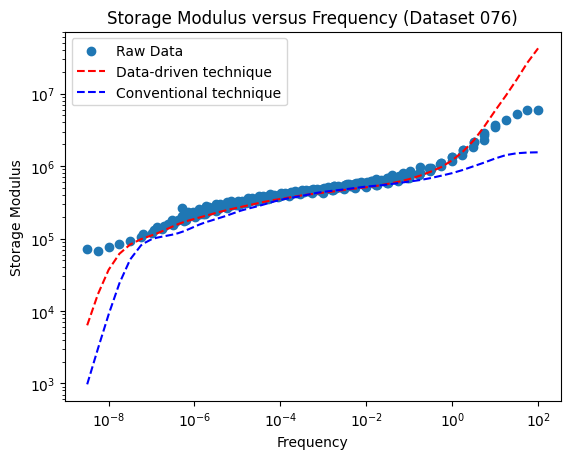

In [ ]:

plt.scatter(O_Omega, O_Gp, label='Raw Data')
plt.plot(O_Omega, Gp_C, label='Data-driven technique', linestyle='--', color='red')
plt.plot(O_Omega, Gp_P, label='Conventional technique', linestyle='--', color='blue')
plt.title('Storage Modulus versus Frequency (Dataset 076)')   #### Chnage relaxation Time
plt.xlabel('Frequency')
plt.ylabel('Storage Modulus')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig('./sample_data/Com_Lasso_Gp_log02_for_'+str(number_coefficients)+'.png')       #### Chnage Relaxation Time
plt.show()

##### Comparison of actual, comventional and data-driven techniques accuray in term of Loss modulus.

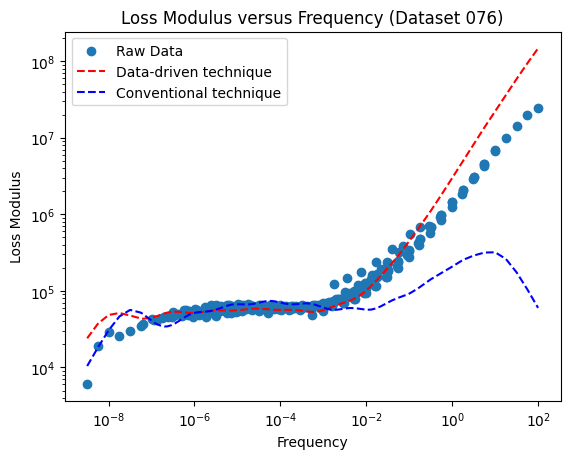

In [ ]:

plt.scatter(O_Omega, O_Gdp,label='Raw Data')
plt.plot(O_Omega, Gdp_C,label='Data-driven technique', linestyle='--', color='red')
plt.plot(O_Omega, Gdp_P,label='Conventional technique', linestyle='--', color='blue')
plt.title('Loss Modulus versus Frequency (Dataset 076)') #### Chnage Relaxation Time
plt.xlabel('Frequency')
plt.ylabel('Loss Modulus')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig('./sample_data/Com_Lasso_Gdp_log02_for_'+str(number_coefficients)+'.png')   ##### Chnage Relaxation Time
plt.show()

##### Calculate shear modulus using obtained coefficients from data-driven techniques.

In [ ]:
## relaxation time
O_t=1/O_Omega

In [ ]:
G_gt=0

for i in range(0,10):
  G_gt=G_gt+ g_co[i]*(np.exp(-O_t/t_co[i]))

#################
G_ct=0

for i in range(0,number_coefficients):
  G_ct=G_ct+coefficients[i]*(np.exp(-O_t/t[i]))


##### Comparison of shear modulus calculated by data-driven and conventional techniques

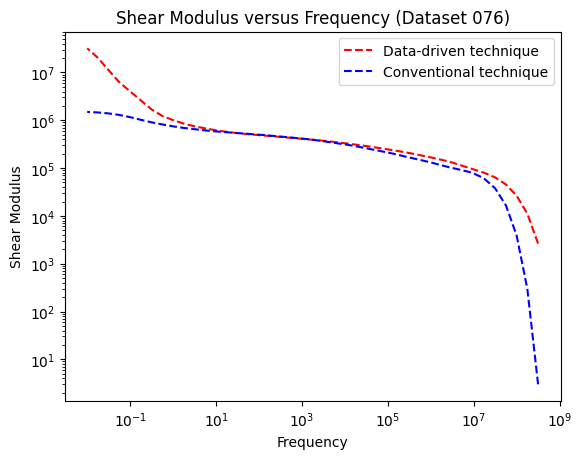

In [ ]:

plt.plot(O_t, G_ct,label='Data-driven technique', linestyle='--', color='red')
plt.plot(O_t, G_gt,label='Conventional technique', linestyle='--', color='blue')
plt.title('Shear Modulus versus Frequency (Dataset 076)') #### Chnage Relaxation Time
plt.xlabel('Frequency')
plt.ylabel('Shear Modulus')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig('./sample_data/Com_Lasso_Gt_log02_for_'+str(number_coefficients)+'.png')   ##### Chnage Relaxation Time
plt.show()

#### Conclusion:
##### The shear modulus calculated by the conventional technique shows more deviation than the shear modulus by the data-driven technique. So, the data-driven technique gives more accurate results than the conventional technique. Data-driven techniques can avoid the complexity and approximation of this calculation.